### Objective: In this project our goal is to predict the probability of a customer is likely to churn using machine learning techniques.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### dataset link: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv

In [2]:
# Import dataset
dataset = pd.read_csv('N:\Projects\Machine Learning Project\Predicting Churn for bank customers\Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# dataset Information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Categorical columns
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [9]:
# Number of categorical columns.
len(dataset.select_dtypes(include='object').columns)

3

In [10]:
# Numerical Columns
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
# Number of numerical columns.
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

11

In [12]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing values

In [13]:
# Check dataset having missing values or not.
dataset.isnull().values.any()

False

In [14]:
# Sum of null values in dataset.
dataset.isnull().values.sum()

0

## Encode the Categorical Data

In [15]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [16]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Drop columns which are not correlated with dependent feature.
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [18]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
dataset.shape

(10000, 11)

In [20]:
# Categorical columns
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [21]:
# Geography column having unique values.
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [22]:
# Gender column having unique values.
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
dataset.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [24]:
dataset.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [25]:
# One hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [26]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## countplot

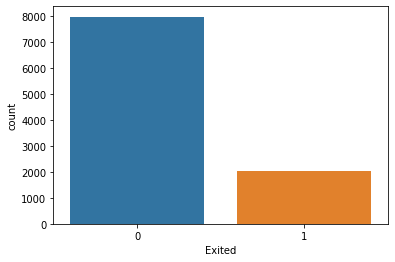

In [27]:
sns.countplot(dataset['Exited'])
plt.show()

In [28]:
# Staying with the bank
(dataset['Exited']==0).sum()

7963

In [29]:
# Exited Customer
(dataset['Exited']==1).sum()

2037

## Correlation Matrix and Heatmap

In [30]:
# dataset contain independent columns 
dataset_2 = dataset.drop(columns='Exited')

<AxesSubplot:title={'center':'Correlated with Exited'}>

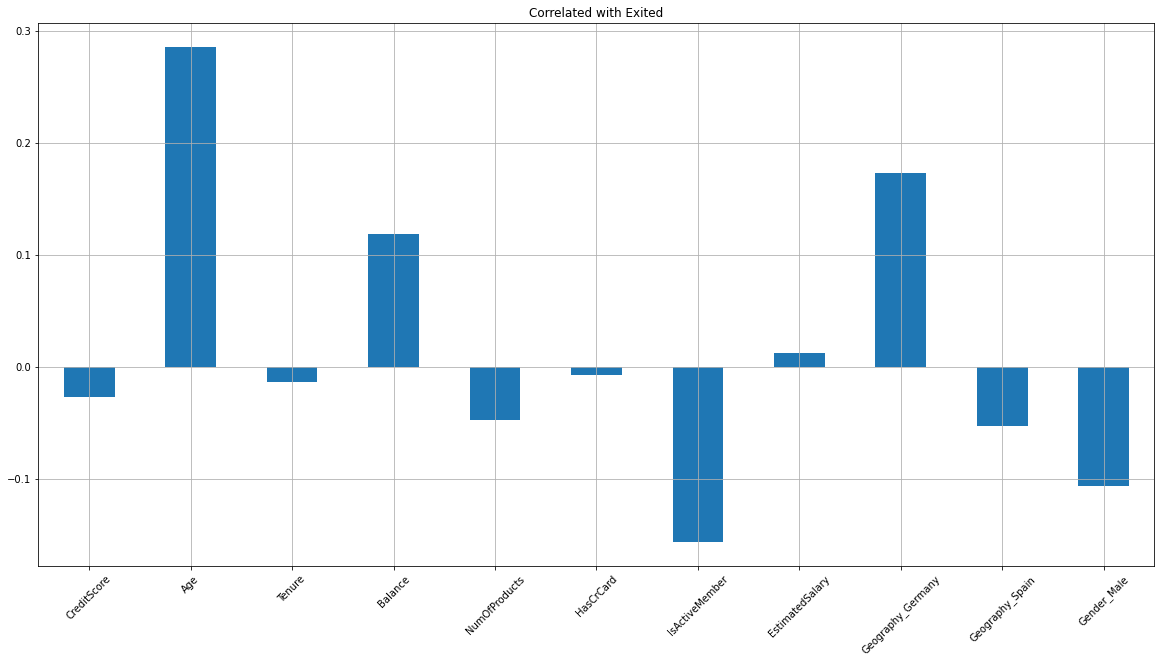

In [31]:
# dependent feature correlated with independent features.
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(20,10), title='Correlated with Exited', rot=45, grid=True)

In [32]:
corr = dataset.corr()

<AxesSubplot:>

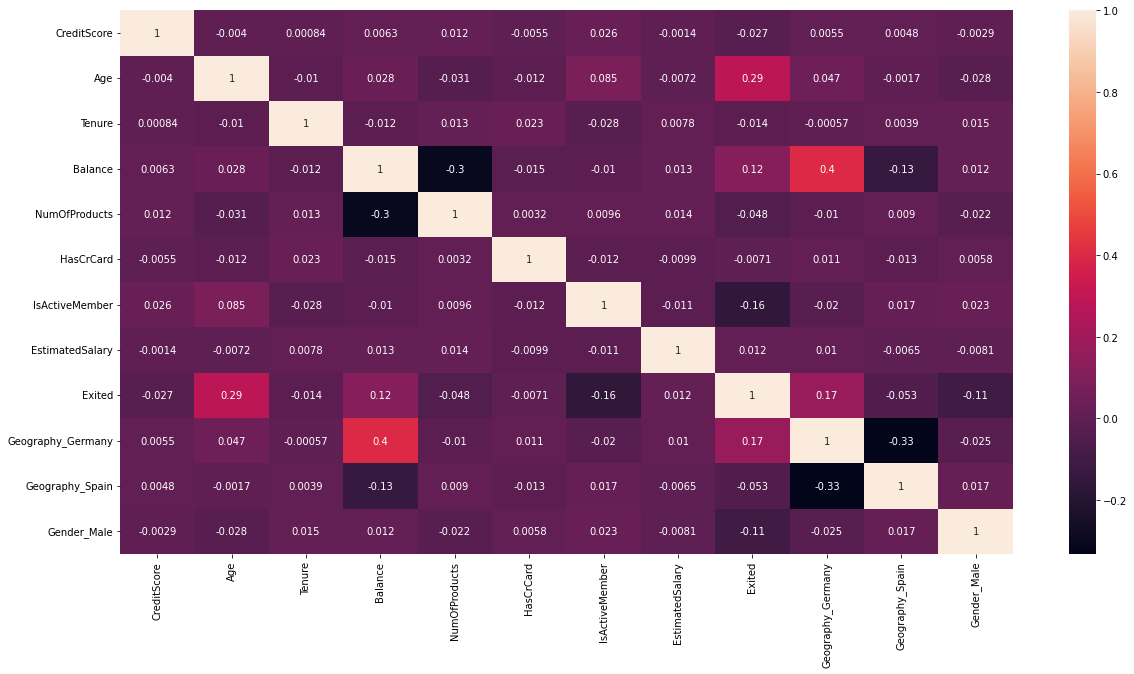

In [33]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [34]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [35]:
#independent variable
x = dataset.drop(columns='Exited')

In [36]:
y = dataset['Exited']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Splitting the dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc = StandardScaler()

In [41]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [43]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

## Building Model

In [44]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

In [45]:
classifier_lr= LogisticRegression()

In [46]:
classifier_lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred = classifier_lr.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [49]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [50]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]], columns=['Model', 'Accuracy', 'F1', 'Precession', 'Recall'])

In [51]:
results

,Model,Accuracy,F1,Precession,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

In [55]:
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.84 %
Standard Deviation is 0.88 %


## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = classifier_rf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [59]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [60]:
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]], columns=['Model', 'Accuracy', 'F1', 'Precession', 'Recall'])

In [61]:
results = results.append(model_results, ignore_index=True)

In [62]:
results

,Model,Accuracy,F1,Precession,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.870,0.622093,0.756184,0.528395


In [63]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 191  214]]


In [64]:
# Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.09 %
Standard Deviation is 0.87 %


## XGBoost Classifier

In [65]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
y_pred = classifier_xgb.predict(x_test)

In [67]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [68]:
model_results = pd.DataFrame([['XGBoost Classifier', acc, f1, prec, rec]], columns=['Model', 'Accuracy', 'F1', 'Precession', 'Recall'])

results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,F1,Precession,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8700,0.622093,0.756184,0.528395
2,XGBoost Classifier,0.8545,0.599725,0.677019,0.538272


In [69]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1491  104]
 [ 187  218]]


In [70]:
# Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.24 %
Standard Deviation is 1.22 %


# Randomized search CV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
parameters = {
    'learnng_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,7,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7]
}

In [73]:
parameters

{'learnng_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [74]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters, 
                                       n_iter=5, n_jobs=-1, scoring='roc_auc', cv=5, verbose=3)

In [75]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learnng_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
   

In [76]:
randomized_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, learnng_rate=0.3, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [77]:
randomized_search.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learnng_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [78]:
randomized_search.best_score_

0.8577123134496057

# Final Model (XGBoost Classifier)

In [81]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0,
              max_depth=3, min_child_weight=5, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=12, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [82]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final XGBoost', acc, f1, prec, rec]], columns=['Model', 'Accuracy', 'F1', 'Precession', 'Recall'])

results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,F1,Precession,Recall
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8700,0.622093,0.756184,0.528395
2,XGBoost Classifier,0.8545,0.599725,0.677019,0.538272
3,Final XGBoost,0.8545,0.599725,0.677019,0.538272


In [83]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1491  104]
 [ 187  218]]


## Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.46 %
Standard Deviation is 1.23 %


# Predicting a single observation

In [85]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [86]:
single_obs = [[502, 42, 8, 159660.80, 3, 1, 0, 113931.57, 0, 0, 0]]

In [87]:
single_obs

[[502, 42, 8, 159660.8, 3, 1, 0, 113931.57, 0, 0, 0]]

In [88]:
classifier.predict(sc.transform(single_obs))

array([1])